In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
import joblib

In [2]:
# Step 1: Load the Dataset
# Replace 'car_prices.csv' with your dataset file
data = pd.read_csv('C:\\Users\\HI\\OneDrive\\Desktop\\i.mobilothon\\train.csv')

# Display basic info about the dataset
print("Dataset Overview:")
print(data.head())

Dataset Overview:
         ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467     -        HONDA      FIT        2006  Hatchback   
3  45769185   3607   862         FORD   Escape        2011       Jeep   
4  45809263  11726   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km        6.0   
1               No    Petrol             3  192000 km        6.0   
2               No    Petrol           1.3  200000 km        4.0   
3              Yes    Hybrid           2.5  168966 km        4.0   
4              Yes    Petrol           1.3   91901 km        4.0   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0     Automatic          4x4  04-May        Left wheel  Silv

In [3]:
#To get the dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [4]:
data.shape

(19237, 18)

In [5]:
#To find the duplicate values
data_dup=data[data.duplicated(keep='last')]
data_dup

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
20,45801686,18826,531,HYUNDAI,Elantra,2012,Sedan,Yes,Petrol,1.6,112645 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
32,45790136,6899,-,BMW,X5,2000,Jeep,Yes,CNG,4.4,200000 km,8.0,Automatic,4x4,04-May,Left wheel,Silver,6
85,45801684,19121,531,HYUNDAI,Elantra,2012,Sedan,Yes,Petrol,1.6,121362 km,4.0,Automatic,Front,04-May,Left wheel,Black,4
86,45732386,36065,639,HYUNDAI,Santa FE,2014,Jeep,Yes,Diesel,2,69191 km,4.0,Automatic,Front,04-May,Left wheel,White,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17001,45815366,23521,-,FORD,Transit,1996,Microbus,No,Diesel,2.5,123000 km,4.0,Manual,Rear,04-May,Left wheel,White,2
17204,45815361,14113,-,TOYOTA,Aqua,2013,Hatchback,No,Hybrid,1.5,100000 km,4.0,Variator,Front,04-May,Right-hand drive,White,6
17428,44754818,11917,-,MERCEDES-BENZ,CLK 320,2003,Sedan,Yes,Petrol,3.2,212000 km,6.0,Automatic,Rear,02-Mar,Left wheel,Pink,8
17463,45809093,96263,866,FORD,Mustang,2015,Sedan,Yes,Petrol,2.3,43770 km,4.0,Automatic,Front,04-May,Left wheel,White,4


In [6]:
#to drop the duplicate values
data=data.drop_duplicates()

data.shape

(18924, 18)

In [7]:
#to reset the index
data=data.reset_index(drop=True)
data_Bk2=data.copy()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18924 entries, 0 to 18923
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                18924 non-null  int64  
 1   Price             18924 non-null  int64  
 2   Levy              18924 non-null  object 
 3   Manufacturer      18924 non-null  object 
 4   Model             18924 non-null  object 
 5   Prod. year        18924 non-null  int64  
 6   Category          18924 non-null  object 
 7   Leather interior  18924 non-null  object 
 8   Fuel type         18924 non-null  object 
 9   Engine volume     18924 non-null  object 
 10  Mileage           18924 non-null  object 
 11  Cylinders         18924 non-null  float64
 12  Gear box type     18924 non-null  object 
 13  Drive wheels      18924 non-null  object 
 14  Doors             18924 non-null  object 
 15  Wheel             18924 non-null  object 
 16  Color             18924 non-null  object

In [9]:
data.nunique()

ID                  18924
Price                2315
Levy                  559
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume         107
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64

In [10]:
data.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [11]:
data['Manufacturer'].value_counts()

HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
                 ... 
TESLA               1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: Manufacturer, Length: 65, dtype: int64

In [12]:
data['Category'].value_counts()

Sedan          8600
Jeep           5378
Hatchback      2799
Minivan         633
Coupe           528
Universal       361
Microbus        299
Goods wagon     229
Pickup           51
Cabriolet        35
Limousine        11
Name: Category, dtype: int64

In [13]:
data['Leather interior'].value_counts()

Yes    13731
No      5193
Name: Leather interior, dtype: int64

In [14]:
data['Fuel type'].value_counts()

Petrol            9944
Diesel            4001
Hybrid            3539
LPG                885
CNG                469
Plug-in Hybrid      85
Hydrogen             1
Name: Fuel type, dtype: int64

In [15]:
data['Gear box type'].value_counts()

Automatic    13282
Tiptronic     3065
Manual        1844
Variator       733
Name: Gear box type, dtype: int64

In [16]:
data['Drive wheels'].value_counts()

Front    12695
4x4       3969
Rear      2260
Name: Drive wheels, dtype: int64

In [17]:
data['Wheel'].value_counts()

Left wheel          17471
Right-hand drive     1453
Name: Wheel, dtype: int64

In [18]:
data['Color'].value_counts()

Black            4944
White            4407
Silver           3729
Grey             2343
Blue             1376
Red               622
Green             321
Orange            252
Brown             185
Carnelian red     177
Golden            143
Beige             134
Sky blue          122
Yellow            105
Purple             39
Pink               25
Name: Color, dtype: int64

In [19]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
data['Leather interior']=LE.fit_transform(data['Leather interior'])
data['Fuel type']=LE.fit_transform(data['Fuel type'])
data['Gear box type']=LE.fit_transform(data['Gear box type'])
data['Drive wheels']=LE.fit_transform(data['Drive wheels'])
data['Wheel']=LE.fit_transform(data['Wheel'])
data['Color']=LE.fit_transform(data['Color'])

In [20]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,1,2,3.5,186005 km,6.0,0,0,04-May,0,12,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,0,5,3,192000 km,6.0,2,0,04-May,0,1,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,0,5,1.3,200000 km,4.0,3,1,04-May,1,1,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,1,2,2.5,168966 km,4.0,0,0,04-May,0,14,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,1,5,1.3,91901 km,4.0,0,1,04-May,0,12,4


In [21]:
# Replace '-' with NaN and convert columns to appropriate data types
data = data.replace('-', np.nan)

# Handle missing values
data.fillna(data.median(numeric_only=True), inplace=True)

# Convert categorical columns to numeric using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Ensure all columns are numeric
data = data.apply(pd.to_numeric, errors='coerce')

# Drop rows with any remaining NaN values
data.dropna(inplace=True)

In [22]:
from sklearn.metrics import mean_squared_error, r2_score 
X = data.drop(columns=['Price'])
y = data['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict prices on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R^2 Score: {r2_score(y_test, y_pred):.2f}")

# Function for Dynamic Pricing Adjustment
def adjust_price(predicted_price, demand_factor=1.1, competitor_factor=0.95):
    """
    Adjusts predicted prices dynamically based on market demand and competitor pricing.
    :param predicted_price: The base predicted price from the model
    :param demand_factor: Multiplier for demand surge (default 10% increase)
    :param competitor_factor: Multiplier for competitor pricing adjustment (default 5% decrease)
    :return: Adjusted price
    """
    adjusted_price = predicted_price * demand_factor * competitor_factor
    return adjusted_price

# Apply Dynamic Pricing to Predictions
adjusted_prices = [adjust_price(price) for price in y_pred]

# Create a DataFrame to Compare Results
results = pd.DataFrame({
    'Original Price': y_test.values,
    'Predicted Price': y_pred,
    'Adjusted Price': adjusted_prices
})

# Save Results
results.to_csv('dynamic_pricing_results.csv', index=False)
print("Results saved to 'dynamic_pricing_results.csv'.")

# Save the Model for Future Use
import joblib
joblib.dump(model, 'dynamic_pricing_model.pkl')
print("Model saved as 'dynamic_pricing_model.pkl'.")

Mean Squared Error: 35497163622.42
R^2 Score: -101.53
Results saved to 'dynamic_pricing_results.csv'.
Model saved as 'dynamic_pricing_model.pkl'.


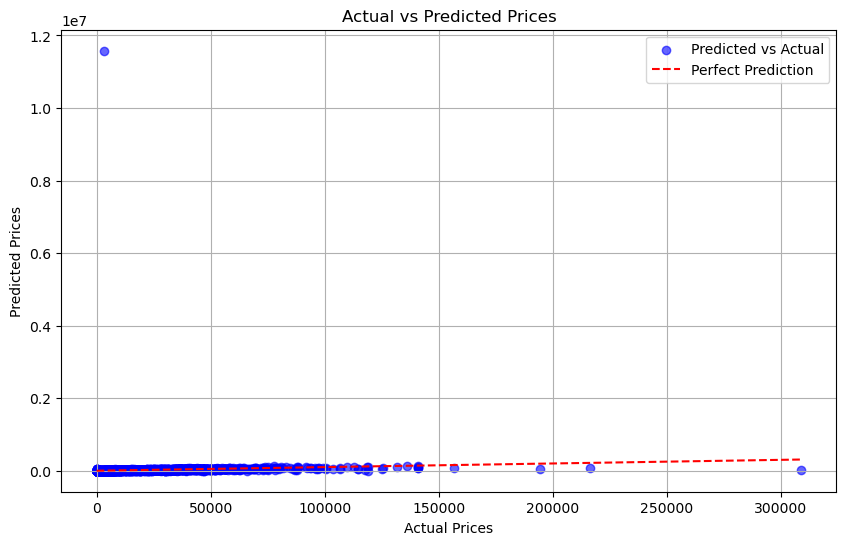

In [23]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()


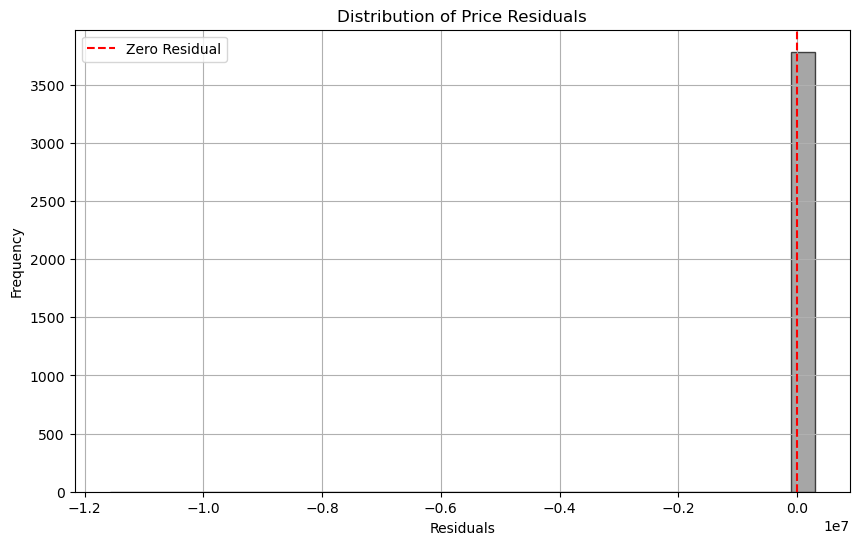

In [24]:
# Calculate residuals
residuals = y_test - y_pred

# Plot distribution of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='gray', edgecolor='black', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', label='Zero Residual')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Price Residuals')
plt.legend()
plt.grid(True)
plt.show()


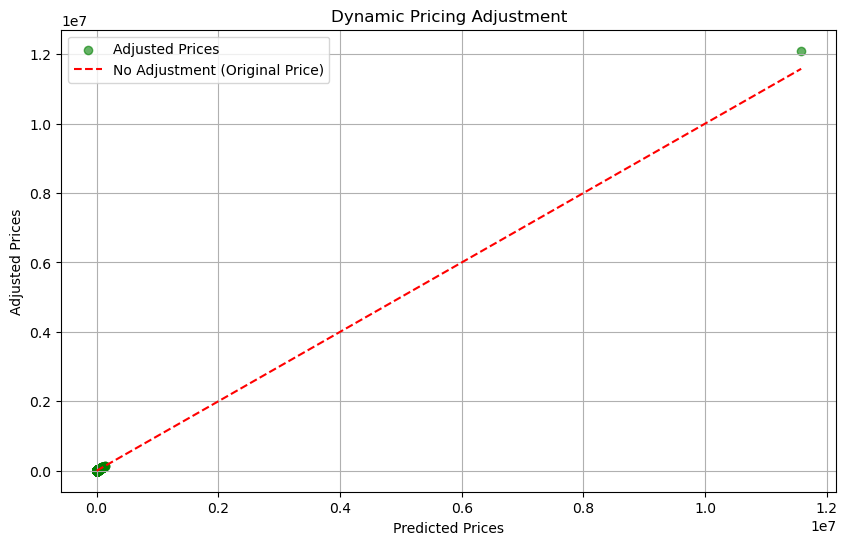

In [25]:
# Plot Dynamic Pricing Adjustments
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, adjusted_prices, color='green', alpha=0.6, label='Adjusted Prices')
plt.plot([min(y_pred), max(y_pred)], [min(y_pred), max(y_pred)], color='red', linestyle='--', label='No Adjustment (Original Price)')
plt.xlabel('Predicted Prices')
plt.ylabel('Adjusted Prices')
plt.title('Dynamic Pricing Adjustment')
plt.legend()
plt.grid(True)
plt.show()


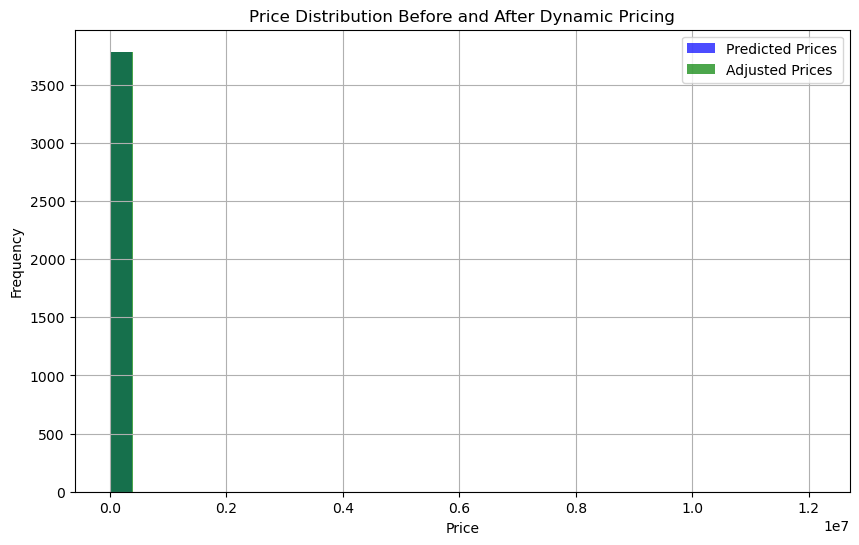

In [26]:
# Plot distribution of prices before and after dynamic pricing
plt.figure(figsize=(10, 6))
plt.hist(y_pred, bins=30, color='blue', alpha=0.7, label='Predicted Prices')
plt.hist(adjusted_prices, bins=30, color='green', alpha=0.7, label='Adjusted Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution Before and After Dynamic Pricing')
plt.legend()
plt.grid(True)
plt.show()


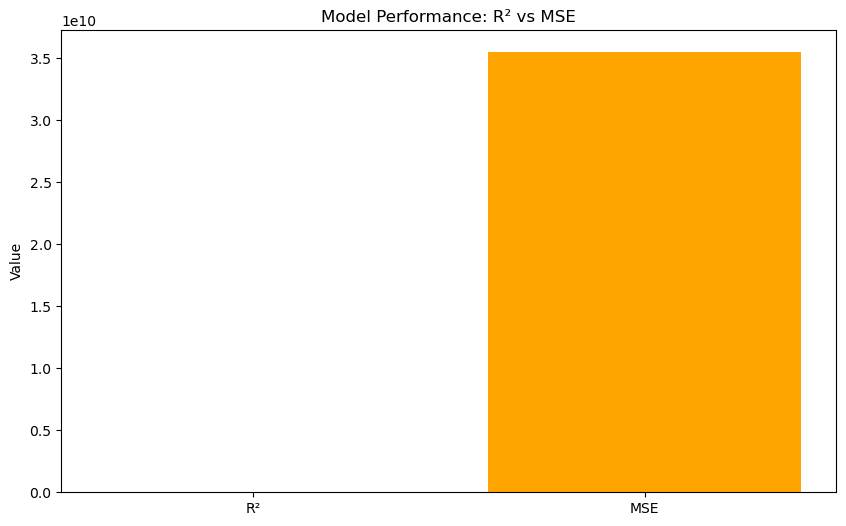

In [27]:
# R² vs MSE for Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plot R² vs MSE
plt.figure(figsize=(10, 6))
metrics = ['R²', 'MSE']
values = [r2, mse]
plt.bar(metrics, values, color=['blue', 'orange'])
plt.title('Model Performance: R² vs MSE')
plt.ylabel('Value')
plt.show()


In [28]:
import plotly.graph_objects as go
from ipywidgets import interact
import numpy as np

# Function to adjust price based on the user input (for dynamic pricing)
def adjust_price(predicted_price, demand_factor=1.1, competitor_factor=0.95, elasticity=0.8):
    """
    Adjusts the predicted price dynamically based on demand, competitor pricing, and price elasticity.
    :param predicted_price: Base predicted price
    :param demand_factor: Multiplier based on forecasted demand (e.g., 10% increase)
    :param competitor_factor: Multiplier based on competitor prices (e.g., 5% discount)
    :param elasticity: Price elasticity of demand factor
    :return: Adjusted price
    """
    adjusted_price = predicted_price * demand_factor * competitor_factor * (1 + elasticity)
    return adjusted_price

# Function to suggest an optimal price based on the input values
def suggest_price(user_price, demand, competitor_price, elasticity):
    """
    Suggests an optimal price based on user input for price, demand, and competitor pricing.
    :param user_price: The price entered by the user
    :param demand: The demand for the product (higher demand may justify a higher price)
    :param competitor_price: The price of the competitor for comparison
    :param elasticity: Price elasticity of demand
    :return: Suggested price based on the model
    """
    demand_factor = 1 + (demand / 100)  # Let's assume demand affects the price by a percentage
    competitor_factor = competitor_price / user_price  # Competitive pricing factor
    
    # Suggest price based on model adjustments
    suggested_price = adjust_price(user_price, demand_factor, competitor_factor, elasticity)
    
    return round(suggested_price)

# Interactive plotting function
def plot_dynamic_pricing(user_price, demand, competitor_price, elasticity):
    """
    Plot a dynamic comparison of user price and suggested price.
    """
    # Suggest the optimal price
    suggested_price = suggest_price(user_price, demand, competitor_price, elasticity)
    
    # Plot the comparison graph using Plotly
    fig = go.Figure()

    # Add bars for user price and suggested price
    fig.add_trace(go.Bar(
        x=['User Price', 'Suggested Price'],
        y=[user_price, suggested_price],
        marker_color=['blue', 'green'],
        text=[f"${user_price}", f"${suggested_price}"],
        textposition='auto'
    ))

    # Update layout to make it responsive
    fig.update_layout(
        title="Price Comparison: User vs Suggested",
        xaxis_title="Pricing Options",
        yaxis_title="Price ($)",
        margin=dict(t=40, b=40, l=50, r=50),
        autosize=True
    )

    # Show the figure
    fig.show()

# Interactive widgets for user input
interact(plot_dynamic_pricing,
         user_price=(10000, 50000, 1000),   # User price input
         demand=(0, 50, 1),                # Demand (percentage increase/decrease)
         competitor_price=(10000, 50000, 1000),  # Competitor price input
         elasticity=(0, 2, 0.1))           # Elasticity of demand factor


interactive(children=(IntSlider(value=30000, description='user_price', max=50000, min=10000, step=1000), IntSl…

<function __main__.plot_dynamic_pricing(user_price, demand, competitor_price, elasticity)>

In [29]:
import pandas as pd

# Sample Data: Competitor prices and features
competitor_data = {
    'Model': ['Competitor_A', 'Competitor_B', 'Competitor_C'],
    'Price': [25000, 22000, 27000],
    'Mileage': [15, 14, 16],  # in km/l
    'Year': [2020, 2021, 2022],
    'Features': ['Basic', 'Standard', 'Premium']
}

# Create DataFrame for competitor vehicles
competitor_df = pd.DataFrame(competitor_data)

# Your vehicle's data
your_vehicle = {
    'Model': 'Your_Vehicle',
    'Price': 26000,
    'Mileage': 15,
    'Year': 2021,
    'Features': 'Standard'
}

# Function to compare competitor prices
def compare_prices(your_price, competitor_df):
    competitor_df['Price Difference'] = competitor_df['Price'] - your_price
    return competitor_df[['Model', 'Price', 'Price Difference']]

# Compare your vehicle price with competitors
competitor_comparison = compare_prices(your_vehicle['Price'], competitor_df)

print(competitor_comparison)


          Model  Price  Price Difference
0  Competitor_A  25000             -1000
1  Competitor_B  22000             -4000
2  Competitor_C  27000              1000


In [30]:
pip install dash

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [31]:
import dash
from dash import dcc, html, Input, Output
import pandas as pd
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Load the dataset
data = {
    "ID": [0, 1, 2, 3, 4],
    "Price": [45654403, 44731507, 45774419, 45769185, 45809263],
    "Levy": [13328, 16621, 8467, 3607, 11726],
    "Manufacturer": ['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HONDA'],
    "Model": ['RX 450', 'Equinox', 'FIT', 'Escape', 'FIT'],
    "Prod. year": [2010, 2011, 2006, 2011, 2014],
    "Category": ['Jeep', 'Jeep', 'Hatchback', 'Jeep', 'Hatchback'],
    "Leather interior": [1, 0, 0, 1, 1],
    "Fuel type": [2, 5, 5, 2, 5],
    "Engine volume": [3.5, 3, 1.3, 2.5, 1.3],
    "Mileage": ['186005 km', '192000 km', '200000 km', '168966 km', '91901 km'],
    "Cylinders": [6.0, 6.0, 4.0, 4.0, 4.0],
    "Gear box type": [0, 2, 3, 0, 0],
    "Drive wheels": [0, 0, 1, 0, 1],
    "Doors": [12, 1, 1, 14, 12],
    "Wheel": ['04-May'] * 5,
    "Color": [0, 0, 1, 0, 0],
    "Airbags": [12, 8, 2, 0, 4]
}

df = pd.DataFrame(data)

# Create Dash App
app = dash.Dash(__name__)

# Layout for the App
app.layout = html.Div([
    html.H1("Dynamic Vehicle Pricing Tool"),
    
    html.Label("Select Manufacturer:"),
    dcc.Dropdown(
        id='manufacturer-dropdown',
        options=[{'label': manufacturer, 'value': manufacturer} for manufacturer in df['Manufacturer'].unique()],
        value=df['Manufacturer'].iloc[0]
    ),
    
    html.Label("Select Model:"),
    dcc.Dropdown(
        id='model-dropdown',
        options=[],
        value=df['Model'].iloc[0]
    ),
    
    html.Label("Select Category:"),
    dcc.Dropdown(
        id='category-dropdown',
        options=[{'label': category, 'value': category} for category in df['Category'].unique()],
        value=df['Category'].iloc[0]
    ),
    
    html.Div(id='dynamic-price', style={'font-size': '20px', 'margin-top': '20px'}),
    
    dcc.Graph(id='price-comparison-graph')
])

# Callback to update available models based on Manufacturer selection
@app.callback(
    Output('model-dropdown', 'options'),
    Input('manufacturer-dropdown', 'value')
)
def update_models(manufacturer):
    models = df[df['Manufacturer'] == manufacturer]['Model'].unique()
    return [{'label': model, 'value': model} for model in models]

# Callback to update dynamic price based on user selections
@app.callback(
    [Output('dynamic-price', 'children'),
     Output('price-comparison-graph', 'figure')],
    [Input('manufacturer-dropdown', 'value'),
     Input('model-dropdown', 'value'),
     Input('category-dropdown', 'value')]
)
def calculate_dynamic_price(manufacturer, model, category):
    # Filter the dataframe based on the selected Manufacturer, Model, and Category
    
    selected_vehicle = df[(df['Manufacturer'] == manufacturer) & 
                      (df['Model'] == model) & 
                      (df['Category'] == category)]

    if selected_vehicle.empty:
        # Handle the case where no vehicle matches the given manufacturer, model, and category
        print("No matching vehicle found.")
    else:
        selected_vehicle = selected_vehicle.iloc[0]
    competitor_df = df[(df['Category'] == category) & (df['Manufacturer'] != manufacturer)]
    
    # Calculate the average price of competitors
    avg_competitor_price = competitor_df['Price'].mean()
    
    # Calculate dynamic price (based on a simple factor or advanced model)
    dynamic_price = avg_competitor_price * 1.1  # Example of adjusting price by 10% higher than competitors
    
    # Display the dynamic price
    dynamic_price_text = f"Suggested Dynamic Price for {model}: ${round(dynamic_price, 2)}"
    
    # Plotting the price comparison
    fig = make_subplots(rows=1, cols=1)
    fig.add_trace(go.Bar(x=['Your Vehicle', 'Average Competitor'], 
                         y=[selected_vehicle['Price'], dynamic_price], 
                         name="Price Comparison"))
    fig.update_layout(title="Price Comparison",
                      xaxis_title="Vehicle",
                      yaxis_title="Price (USD)",
                      showlegend=True)
    
    return dynamic_price_text, fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
